In [3]:
import pandas as pd
df=pd.read_csv("All1000.csv")
df_bis=pd.read_csv("Top1000.csv")
df_bis.shape

(6000, 3)

In [4]:
import matplotlib.pyplot as plt
scenario_counts = {}
for row in df_bis.itertuples():
  sector, scenario = row.Secteur, row.Scenario
  if sector not in scenario_counts:
    scenario_counts[sector] = {}
  scenario_counts[sector][scenario] = scenario_counts[sector].get(scenario, 0) + 1

# Define colors for the bars (optional)
  # Adjust as needed for more sectors
data=scenario_counts
data


{1: {3: 167, 15: 146, 11: 656, 2: 31},
 2: {3: 425, 15: 395, 2: 74, 11: 106},
 3: {11: 908, 3: 62, 15: 27, 2: 3},
 4: {11: 539, 3: 175, 15: 199, 2: 87},
 5: {11: 791, 3: 84, 15: 90, 2: 35},
 6: {11: 330, 3: 318, 15: 286, 2: 66}}

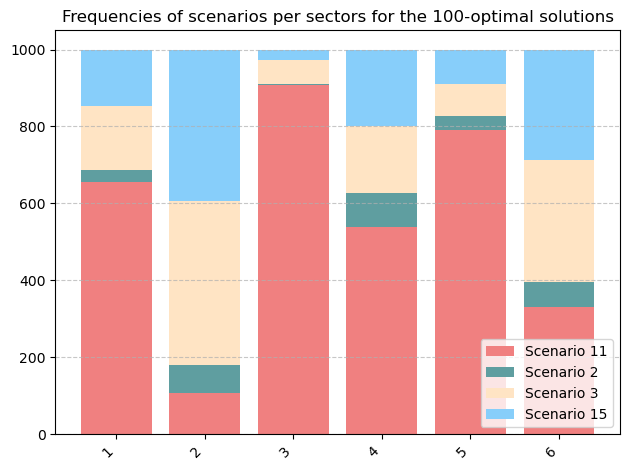

In [5]:
import matplotlib.pyplot as plt
import numpy as np


# Extract keys and values from the dictionary
keys = list(data.keys())
values = list(data.values())

# Separate data for each inner dictionary with zeros for missing keys
inner_data = []
for value in values:
    # Get all unique keys from the entire data dictionary
    all_keys = set(key for inner_dict in data.values() for key in inner_dict.keys())
    # Create a list with zeros for missing keys and values for existing keys
    inner_data.append([value.get(key, 0) for key in all_keys])

# 
m=np.matrix(inner_data).T

y1=np.array(m[0,:])[0]
y2=np.array(m[1,:])[0]
y3=np.array(m[2,:])[0]
y4=np.array(m[3,:])[0]
plt.bar(keys, y1, color='lightcoral')
plt.bar(keys, y2, bottom=y1, color='cadetblue')
plt.bar(keys, y3, bottom=y1+y2, color='bisque')
plt.bar(keys, y4, bottom=y1+y2+y3, color='lightskyblue')
plt.legend(["Scenario "+str(i) for i in list(set(df_bis['Scenario'].values))])
plt.title("Frequencies of scenarios per sectors for the 1000-optimal solutions")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements

plt.show()


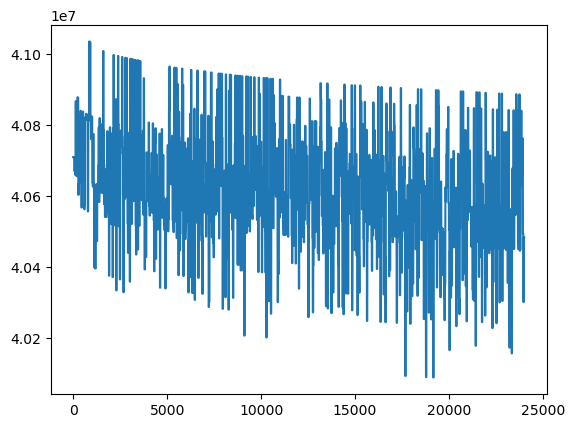

In [19]:
plt.plot(df["CA_expr"])

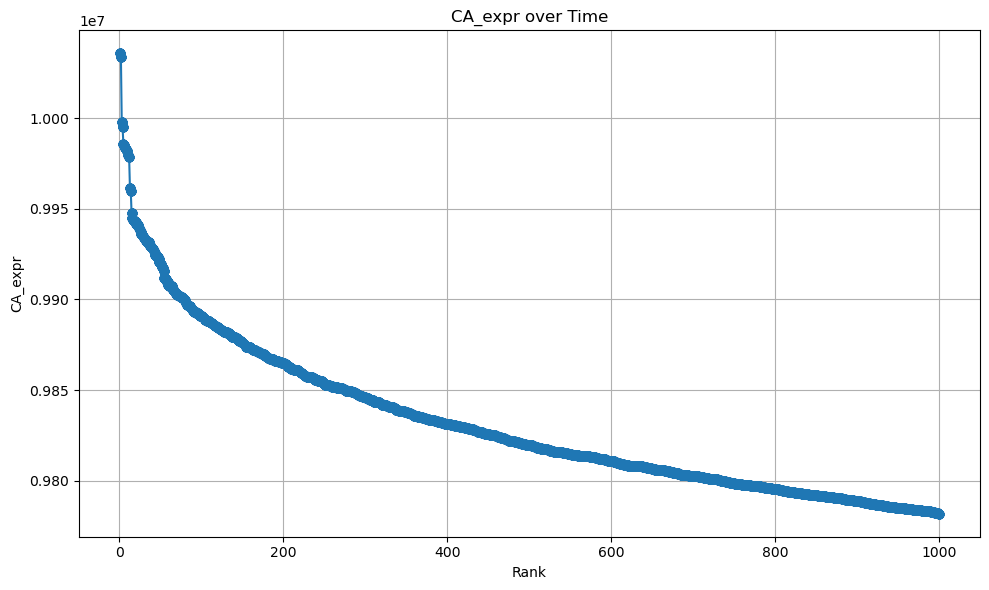

In [22]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# If your DataFrame is named differently, replace df with your DataFrame name

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Rank'], df['CA_expr']-df['CMO_expr']-df['CV_expr'], marker='o', linestyle='-')
plt.title('CA_expr over Time')
plt.xlabel('Rank')
plt.ylabel('CA_expr')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
df=df[['Rank',  'Scenario', 'CA_expr',
       'CMO_expr', 'CV_expr', 'Secteur'] ]
df=df.drop_duplicates()
df.shape


(6000, 6)

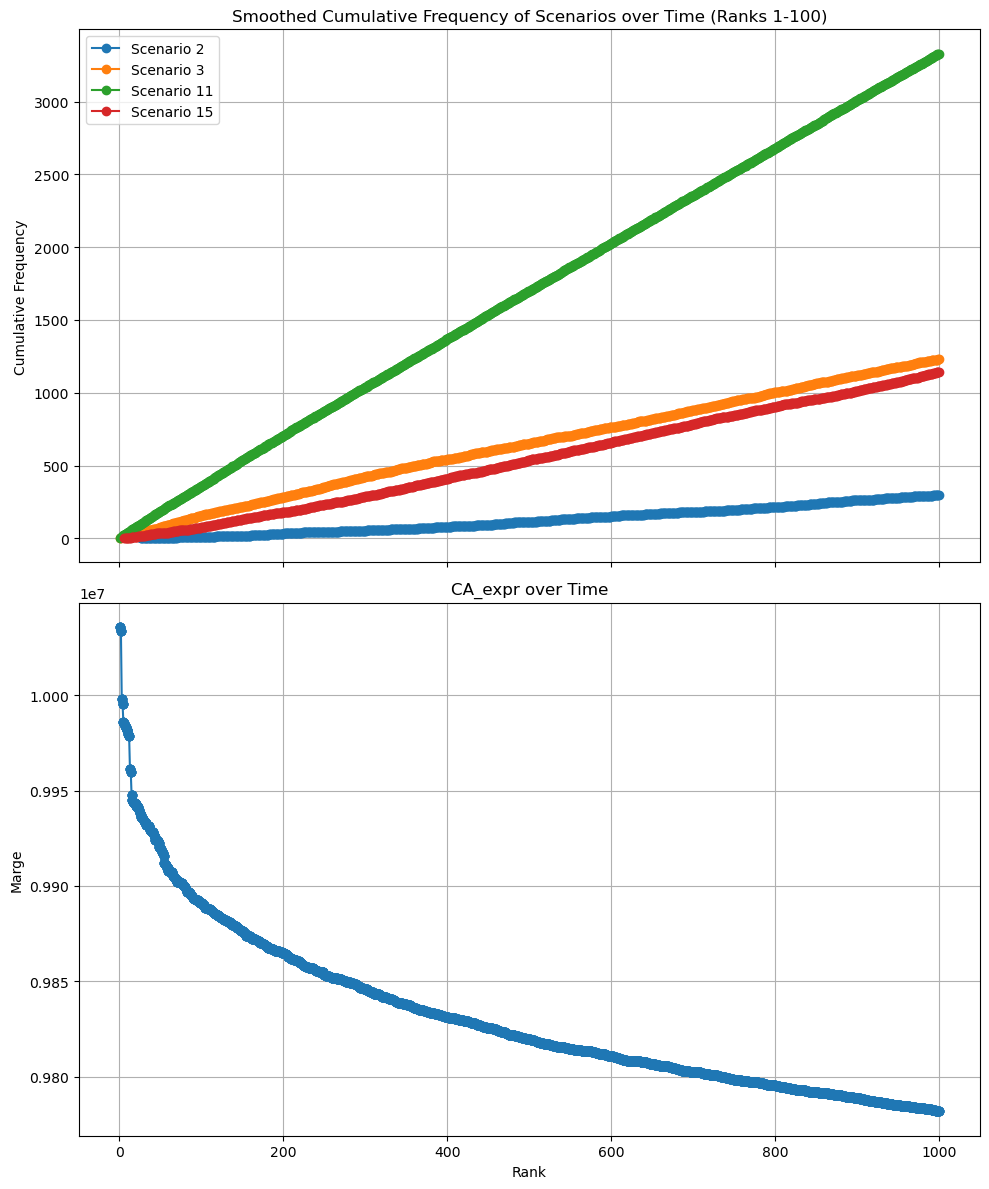

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

# Assuming your DataFrame is named df
# If your DataFrame is named differently, replace df with your DataFrame name

# Filter the DataFrame for Rank values from 1 to 100
df_filtered = df

# Group by Rank and Scenario, count occurrences, and reset index
scenario_counts = df_filtered.groupby(['Rank', 'Scenario']).size().reset_index(name='Frequency')

# Calculate cumulative frequency
scenario_counts['Cumulative Frequency'] = scenario_counts.groupby('Scenario')['Frequency'].cumsum()

# Pivot the DataFrame for easier plotting
pivot_df = scenario_counts.pivot(index='Rank', columns='Scenario', values='Cumulative Frequency').fillna(method='ffill')

# Interpolate missing values for smoother curves
smooth_df = pivot_df.interpolate(method='cubic')

# Plotting both plots in a single figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plotting smoothed cumulative frequency of scenarios over time
for column in smooth_df.columns:
    ax1.plot(smooth_df.index, smooth_df[column], marker='o', linestyle='-', label=f'Scenario {column}')

ax1.set_title('Smoothed Cumulative Frequency of Scenarios over Time (Ranks 1-100)')
ax1.set_ylabel('Cumulative Frequency')
ax1.legend()
ax1.grid(True)

# Plotting CA_expr over time
ax2.plot(df['Rank'], df['CA_expr'] - df['CMO_expr'] - df['CV_expr'], marker='o', linestyle='-')
ax2.set_title('CA_expr over Time')
ax2.set_xlabel('Rank')
ax2.set_ylabel('Marge')
ax2.grid(True)

plt.tight_layout()
plt.show()


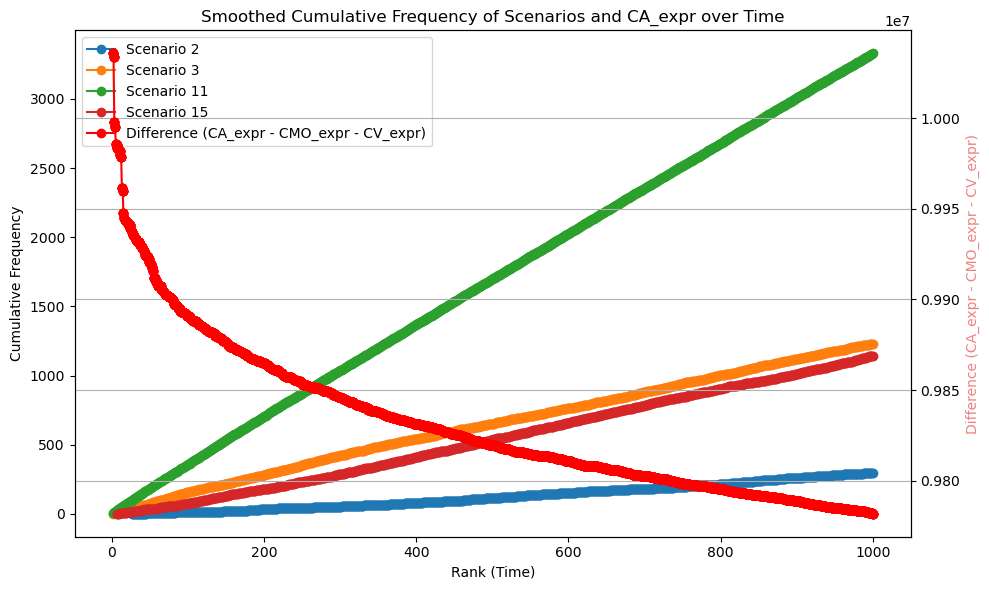

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

# Assuming your DataFrame is named df
# If your DataFrame is named differently, replace df with your DataFrame name

# Filter the DataFrame for Rank values from 1 to 100
df_filtered = df

# Group by Rank and Scenario, count occurrences, and reset index
scenario_counts = df_filtered.groupby(['Rank', 'Scenario']).size().reset_index(name='Frequency')

# Calculate cumulative frequency
scenario_counts['Cumulative Frequency'] = scenario_counts.groupby('Scenario')['Frequency'].cumsum()

# Pivot the DataFrame for easier plotting
pivot_df = scenario_counts.pivot(index='Rank', columns='Scenario', values='Cumulative Frequency').fillna(method='ffill')

# Interpolate missing values for smoother curves
smooth_df = pivot_df.interpolate(method='cubic')

# Plotting both plots in a single figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting smoothed cumulative frequency of scenarios over time on the first y-axis
for column in smooth_df.columns:
    ax1.plot(smooth_df.index, smooth_df[column], marker='o', linestyle='-', label=f'Scenario {column}')

ax1.set_title('Smoothed Cumulative Frequency of Scenarios and CA_expr over Time')
ax1.set_xlabel('Rank (Time)')
ax1.set_ylabel('Cumulative Frequency')

# Create a second y-axis for the difference between CA_expr, CMO_expr, and CV_expr
ax2 = ax1.twinx()
ax2.plot(df['Rank'], df['CA_expr'] - df['CMO_expr'] - df['CV_expr'], marker='o', linestyle='-', color='red', label='Difference (CA_expr - CMO_expr - CV_expr)')
ax2.set_ylabel('Difference (CA_expr - CMO_expr - CV_expr)', color='lightcoral')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()


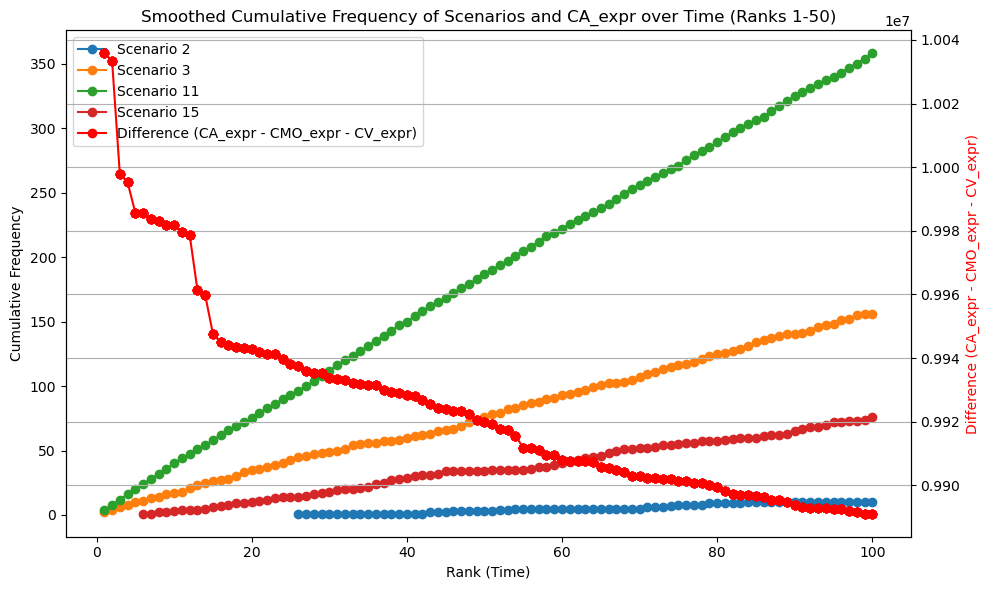

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

# Assuming your DataFrame is named df
# If your DataFrame is named differently, replace df with your DataFrame name

# Filter the DataFrame for Rank values from 1 to 50
df_filtered = df[df['Rank'].between(1, 100)]

# Group by Rank and Scenario, count occurrences, and reset index
scenario_counts = df_filtered.groupby(['Rank', 'Scenario']).size().reset_index(name='Frequency')

# Calculate cumulative frequency
scenario_counts['Cumulative Frequency'] = scenario_counts.groupby('Scenario')['Frequency'].cumsum()

# Pivot the DataFrame for easier plotting
pivot_df = scenario_counts.pivot(index='Rank', columns='Scenario', values='Cumulative Frequency').fillna(method='ffill')

# Interpolate missing values for smoother curves
smooth_df = pivot_df.interpolate(method='cubic')

# Plotting both plots in a single figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting smoothed cumulative frequency of scenarios over time on the first y-axis
for column in smooth_df.columns:
    ax1.plot(smooth_df.index, smooth_df[column], marker='o', linestyle='-', label=f'Scenario {column}')

ax1.set_title('Smoothed Cumulative Frequency of Scenarios and CA_expr over Time (Ranks 1-50)')
ax1.set_xlabel('Rank (Time)')
ax1.set_ylabel('Cumulative Frequency')

# Create a second y-axis for the difference between CA_expr, CMO_expr, and CV_expr
ax2 = ax1.twinx()
ax2.plot(df_filtered['Rank'], df_filtered['CA_expr'] - df_filtered['CMO_expr'] - df_filtered['CV_expr'], marker='o', linestyle='-', color='red', label='Difference (CA_expr - CMO_expr - CV_expr)')
ax2.set_ylabel('Difference (CA_expr - CMO_expr - CV_expr)', color='red')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
!pip install --upgrade matplotlib

^C


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from IPython.display import display, clear_output
import time

# Assuming your DataFrame is named df
# If your DataFrame is named differently, replace df with your DataFrame name

# Function to update the plot for each frame of the animation
def update(frame):
    global df
    global ax1, ax2

    # Filter the DataFrame for Rank values from 50 to current frame with a step of 50
    df_filtered = df[df['Rank'].between(1,  (frame + 1) * 5)]

    # Group by Rank and Scenario, count occurrences, and reset index
    scenario_counts = df_filtered.groupby(['Rank', 'Scenario']).size().reset_index(name='Frequency')

    # Calculate cumulative frequency
    scenario_counts['Cumulative Frequency'] = scenario_counts.groupby('Scenario')['Frequency'].cumsum()

    # Pivot the DataFrame for easier plotting
    pivot_df = scenario_counts.pivot(index='Rank', columns='Scenario', values='Cumulative Frequency').fillna(method='ffill')

    # Interpolate missing values for smoother curves
    smooth_df = pivot_df.interpolate(method='cubic')

    # Clear previous plot
    ax1.clear()
    ax2.clear()

    # Plotting smoothed cumulative frequency of scenarios over time on the first y-axis
    for column in smooth_df.columns:
        ax1.plot(smooth_df.index, smooth_df[column], marker='o', linestyle='-', label=f'Scenario {column}')

    ax1.set_title(f'Smoothed Cumulative Frequency of Scenarios and CA_expr over Time (Ranks 50-{50 + (frame + 1) * 50})')
    ax1.set_xlabel('Rank (Time)')
    ax1.set_ylabel('Cumulative Frequency')

    # Plotting CA_expr - CMO_expr - CV_expr on the second y-axis
    ax2.plot(df_filtered['Rank'], df_filtered['CA_expr'] - df_filtered['CMO_expr'] - df_filtered['CV_expr'], marker='o', linestyle='-', color='red', label='Difference (CA_expr - CMO_expr - CV_expr)')
    ax2.set_ylabel('Difference (CA_expr - CMO_expr - CV_expr)', color='red')

    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1, labels1, loc='upper left')
    ax2.legend(lines2, labels2, loc='upper right')

    ax1.grid(True)
    ax2.grid(True)

    # Display the plot
    display(fig)
    clear_output(wait=True)
    plt.pause(0.03)

# Create a figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Animate the plot
for frame in range(20):  # 20 frames for Ranks 50 to 1000 with a step of 50
    update(frame)

# Show the final plot
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>